# Do the Hello World Example on a 2-Qubit Bell State

## Step 1: Map the problem to circuits and operators.

To generate a Bell State you apply a Hadamard gate on the first qubit and then a CNOT gate.

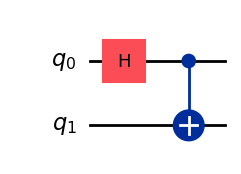

In [1]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.h(0) # Hadamard gate on first qubit
qc.cx(0,1) # CNOT


qc.draw(output = "mpl")

In [2]:
from qiskit.quantum_info import Pauli

ZZ = Pauli("ZZ")
ZI = Pauli("ZI")
IZ = Pauli("ZZ")
XX = Pauli("XX")
XI = Pauli("XI")
IX = Pauli("IX")

observables = [ZZ, ZI, IZ, XX, XI, IX]

## Step 2: Optimise

## Step 3: Execute on backend

In [5]:
from qiskit_aer.primitives import Estimator

estimator = Estimator()

job = estimator.run([qc] * len(observables), observables)
job.result()

EstimatorResult(values=array([ 1.        , -0.0390625 ,  1.        ,  1.        ,  0.01367188,
        0.01367188]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 8, 'parallel_shots': 1, 'sample_measure_time': 0.001624417, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'device': 'CPU', 'time_taken': 0.005889458, 'measure_sampling': True, 'num_clbits': 2, 'max_memory_mb': 8192, 'input_qubit_map': [[1, 1], [0, 0]], 'num_qubits': 2, 'method': 'stabilizer', 'required_memory_mb': 0, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.99847412109375, 'simulator_metadata': [{'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 8, 'parallel_shots': 1, 'sample_measure_time': 0.001624417, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 

## Step 4: Post-Processing (and plotting)

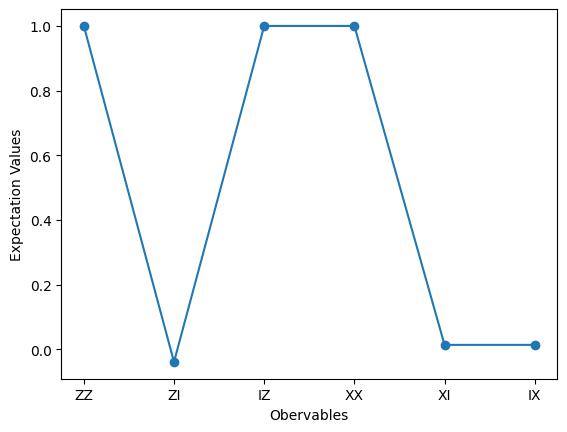

In [7]:
import matplotlib.pyplot as plt

data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
values = job.result().values

plt.plot(data, values, '-o')
plt.xlabel('Obervables')
plt.ylabel('Expectation Values')
plt.show()

### Extend the Hello World Example to an $n$-qubit GHZ state.

## Step 1: Map the problem to circuits and operators

In [8]:
def get_gc_for_n_qubit_GHZ(n):
    qc = QuantumCircuit(n)
    qc.h(0)
    for i in range(n-1):
        qc.cx(i, i+1)
    return qc

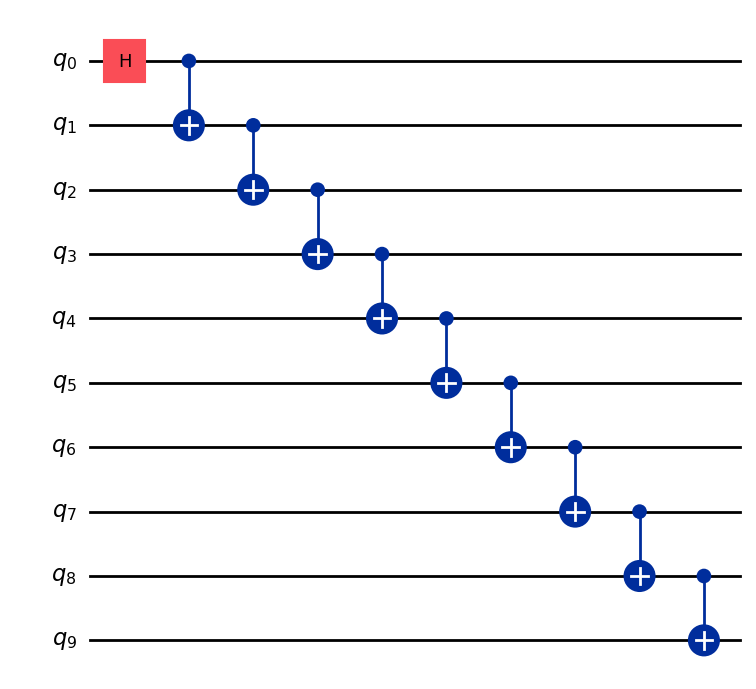

In [9]:
n = 10
qc = get_gc_for_n_qubit_GHZ(n)
qc.draw(output='mpl')